# DSCI 503 - Homework 04
### Bernard Mwamburi

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)
mean = np.sum(x) / n
diff = x - mean
var = np.sum(diff ** 2) / (n - 1)
print(f'''
Sample Mean:     {mean}
Sample Variance: {var}''')


Sample Mean:     16.6
Sample Variance: 25.6


In [3]:
mean_np =  np.mean(x)
var_np = np.var(x, ddof=1)
print(f'''
Sample Mean:     {mean_np}
Sample Variance: {var_np}''')


Sample Mean:     16.6
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    return np.sum((true_y - pred_y) ** 2)

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])
sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)
print(f'''
Model 1 SSE: {sse_1:.2f}
Model 2 SSE: {sse_2:.2f}
''')


Model 1 SSE: 22.66
Model 2 SSE: 19.90



## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    return np.sum(pred_y == true_y) / len(true_y)

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])
accuracy = find_accuracy(true_diag, pred_diag)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
                        'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 
                        'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])
accuracy_2 = find_accuracy(true_labels, pred_labels)
print(f"Model Accuracy: {accuracy_2}")

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    accuracy = find_accuracy(true_y, pred_y)
    TP = np.sum((pred_y == classes[1]) & (true_y == classes[1]))
    FP = np.sum((pred_y == classes[1]) & (true_y == classes[0]))
    TN = np.sum((pred_y == classes[0]) & (true_y == classes[0]))
    FN = np.sum((pred_y == classes[0]) & (true_y == classes[1]))
    pos_precision = TP / (TP + FP)
    pos_recall = TP / (TP + FN)
    neg_precision = TN / (TN + FN)
    neg_recall = TN / (TN + FP)
    print(f'''
    Positive Class:     {classes[1]}
    Negative Class:     {classes[0]}
    
    Accuracy:           {accuracy:.4f}
    Positive Precision: {pos_precision:.4f}
    Positive Recall:    {pos_recall:.4f}
    Negative Precision: {neg_precision:.4f}
    Negative Recall:    {neg_recall:.4f}
    ''')

In [10]:
classification_report(true_diag, pred_diag)


    Positive Class:     P
    Negative Class:     N
    
    Accuracy:           0.7500
    Positive Precision: 0.5556
    Positive Recall:    0.8333
    Negative Precision: 0.9091
    Negative Recall:    0.7143
    


In [11]:
classification_report(true_labels, pred_labels)


    Positive Class:     dog
    Negative Class:     cat
    
    Accuracy:           0.8750
    Positive Precision: 0.8333
    Positive Recall:    0.9091
    Negative Precision: 0.9167
    Negative Recall:    0.8462
    


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)
X = np.random.normal(loc=0, scale=0.4, size=25000)
Y = np.exp(X)
sample_mean_X = np.mean(X)
sample_stddev_X = np.std(X, ddof=1)
sample_mean_Y = np.mean(Y)
sample_stddev_Y = np.std(Y, ddof=1)
print(f'''
Sample mean of X:    {sample_mean_X:.4f}
Sample Std Dev of X: {sample_stddev_X:.4f}
Sample Mean of Y:    {sample_mean_Y:.4f}
Sample Std Dev of Y: {sample_stddev_Y:.4f}
''')


Sample mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y:    1.0862
Sample Std Dev of Y: 0.4537



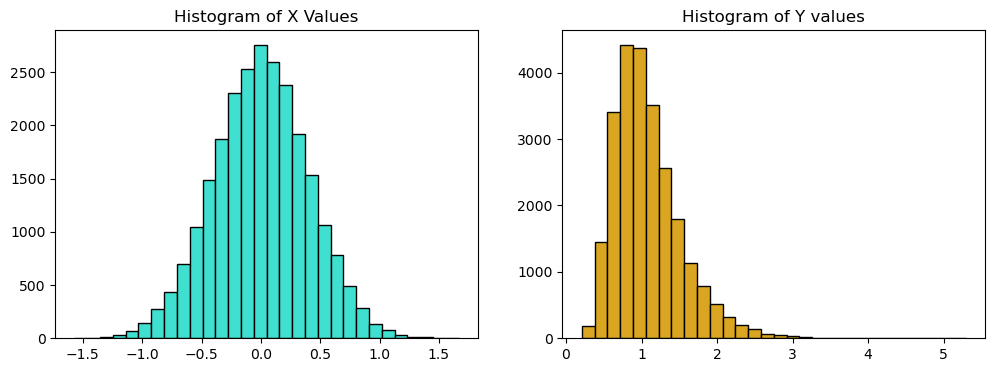

In [13]:
colors = ['turquoise', 'goldenrod', 'firebrick', 'navy']
color_1 = np.random.choice(colors)
color_2 = np.random.choice(colors)

plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(X, edgecolor='black', color=color_1, bins=30)
plt.title("Histogram of X Values")

plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor='black', color=color_2, bins=30)
plt.title("Histogram of Y values")

plt.show()

In [14]:
print(f'''
Probability that Y is less than 0.5: {np.mean(Y < 0.5):.4f}
Probability that Y is less than 1.0: {np.mean(Y < 1.0):.4f}
Probability that Y is less than 2.0: {np.mean(Y < 2.0):.4f}
''')


Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574



## Problem 6: Stochastic Linear Relationships

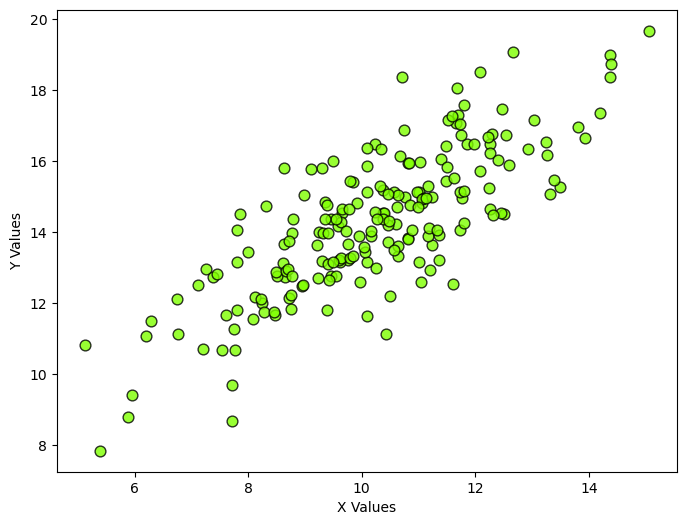

In [15]:
np.random.seed(1)
x_vals = np.random.normal(loc=10, scale=2, size=200)
errors = np.random.normal(loc=0, scale=1.2, size=200)
y_vals = 5.1 + (0.9 * x_vals) + errors

plt.figure(figsize=[8, 6])
plt.scatter(x=x_vals, y=y_vals, s=60, alpha=0.8, edgecolor='black', color='chartreuse')
plt.xlabel("X Values")
plt.ylabel("Y Values")

plt.show()

In [16]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)
top_fraction = np.sum(diff_x * diff_y)
bottom_fraction = math.sqrt(np.sum(x_vals ** 2) * np.sum(y_vals**2))
r = top_fraction / bottom_fraction

print(f"Correlation between X and Y: {r}")

Correlation between X and Y: 0.01918879754459717


## Problem 7: Relationships between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['tomato', 'lightseagreen', 'mediumpurple', 'darkkhaki']

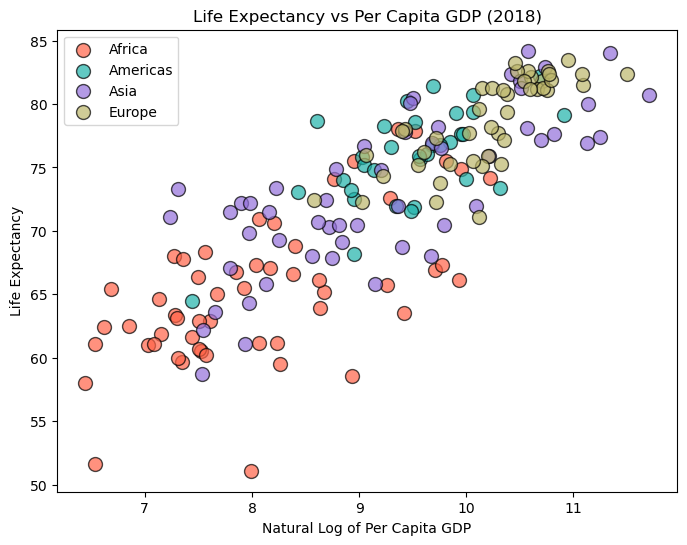

In [19]:
plt.figure(figsize=[8, 6])
for item in continent_list:
    sel = (continent == item) & (year == 2018)
    plt.scatter(x=np.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7,
                edgecolor='black', color=color_list[continent_list.index(item)], label=item.title())
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()

plt.show()

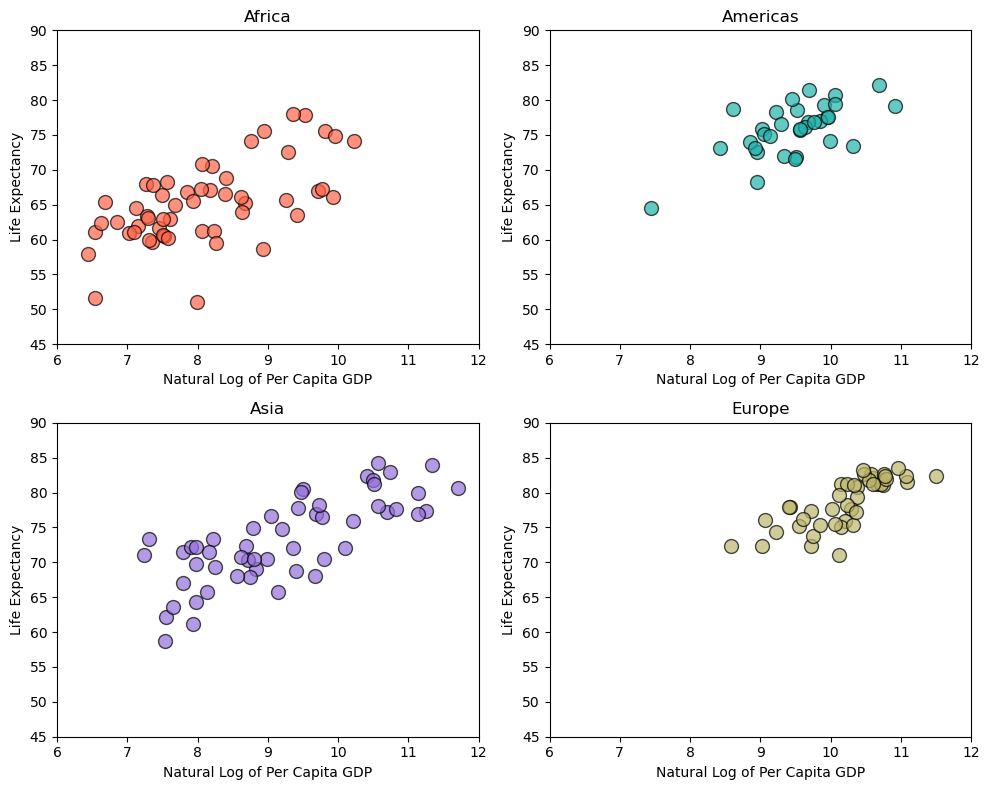

In [20]:
plt.figure(figsize=[10, 8])
for item in continent_list:
    sel = (continent == item) & (year == 2018)
    plt.subplot(2, 2, continent_list.index(item) + 1)
    plt.scatter(x=np.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7,
                edgecolor='black', color=color_list[continent_list.index(item)])
    plt.xlim(6, 12)
    plt.ylim(45, 90)
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title(item.title())

plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

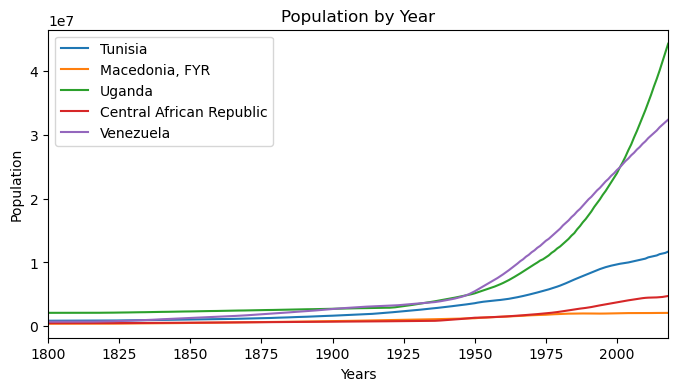

In [21]:
country_list = list(np.random.choice(country, size=5, replace=False))
plt.figure(figsize=[8, 4])
for count in country_list:
    sel = (country == count)
    pop = population[sel]
    yr = year[sel]
    plt.plot(yr, pop, label=count)

plt.xlim(1800, 2018)
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()

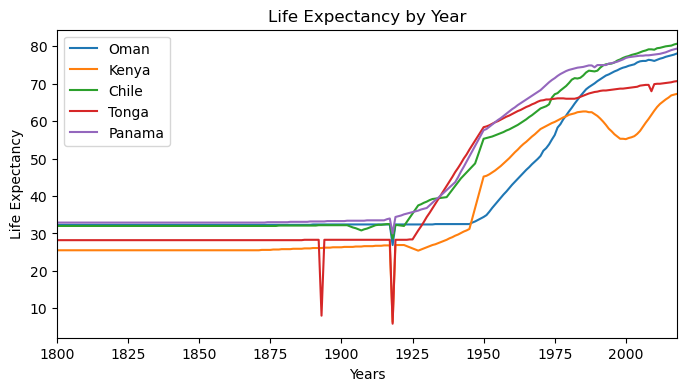

In [22]:
country_list = list(np.random.choice(country, size=5, replace=False))
plt.figure(figsize=[8, 4])
for count in country_list:
    sel = (country == count)
    l_exp = life_exp[sel]
    yr = year[sel]
    plt.plot(yr, l_exp, label=count)

plt.xlim(1800, 2018)
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()